In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.constants import FIG_DIR
from dogo.results import get_scores_df

In [13]:
plt.rc('font', size=22)
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
lss =  ['-', '--']

In [4]:
evaluation_datasets_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M"),
    ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    ("SAC-RT-0.1M-4-P0_10000", "SL: 0.1M"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M"),
    ("SAC-RT-1M-4-P0_10000", "SL: 1M"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    # ("SAC-RT-2M-2-P0_10000", "Softlearning 2 - 2M Steps"),
    # ("SAC-RT-3M-2-P0_10000", "Softlearning 2 - 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    ("D4RL-HC-M_10000", "D4RL: M"),
    ("D4RL-HC-ME_10000", "D4RL: ME"),
    ("D4RL-HC-MR_10000", "D4RL: MR"),
    ("D4RL-HC-R_10000", "D4RL: R"),
    ("RAND-1_10000", "Random 1"),
    ("RAND-2_10000", "Random 2"),
    ("RAND-3_10000", "Random 3"),
]
evaluation_datasets = [i[0] for i in evaluation_datasets_lables]
evaluation_labels = [i[1] for i in evaluation_datasets_lables]

training_datasets_labels = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "0.5M Steps"),
    ("D3RLPY-RT-1M-4-P0_10000", "1M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "2M Steps"),
]
training_datasets = [i[0] for i in training_datasets_labels]
training_labels = [i[1] for i in training_datasets_labels]

easy_dataset_lables = [
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY: 0.2M Steps"),
    ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY: 0.5M Steps"),
    ("SAC-RT-0.25M-4-P0_10000", "SL: 0.25M Steps"),
    ("SAC-RT-0.5M-4-P0_10000", "SL: 0.5M Steps"),
    # ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY: 1M Steps"),
    # ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY: 2M Steps"),
]
easy_datasets = [i[0] for i in easy_dataset_lables]
easy_labels = [i[1] for i in easy_dataset_lables]

hard_dataset_lables = [
    # ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY 1 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-4-P0_10000", "D3RLPY 1 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-4-P0_10000", "D3RLPY 1 - 1M Steps"),
    # ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-2-P0_10000", "D3RLPY 2 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-2-P0_10000", "D3RLPY 2 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-2-P0_10000", "D3RLPY 2 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-2-P0_10000", "D3RLPY 2 - 1M Steps"),
    # ("D3RLPY-RT-2M-2-P0_10000", "D3RLPY 2 - 2M Steps"),
    # ("D3RLPY-RT-0.1M-3-P0_10000", "D3RLPY 3 - 0.1M Steps"),
    # ("D3RLPY-RT-0.2M-3-P0_10000", "D3RLPY 3 - 0.2M Steps"),
    # ("D3RLPY-RT-0.5M-3-P0_10000", "D3RLPY 3 - 0.5M Steps"),
    # ("D3RLPY-RT-1M-3-P0_10000", "D3RLPY 3 - 1M Steps"),
    # ("D3RLPY-RT-2M-3-P0_10000", "D3RLPY 3 - 2M Steps"),
    # ("D4RL-HC-M_10000", "D4RL Medium"),
    ("D4RL-HC-ME_10000", "D4RL: Medium-Expert"),
    ("D4RL-HC-MR_10000", "D4RL: Medium-Replay"),
    ("D4RL-HC-R_10000", "D4RL Random"),
    # ("SAC-RT-0.1M-4-P0_10000", "Softlearning 1 - 0.1M Steps"),
    # ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1 - 0.25M Steps"),
    # ("SAC-RT-0.5M-4-P0_10000", "Softlearning 1 - 0.5M Steps"),
    # ("SAC-RT-1M-4-P0_10000", "Softlearning 1 - 1M Steps"),
    ("SAC-RT-2M-4-P0_10000", "SL: 2M Steps"),
    ("SAC-RT-3M-4-P0_10000", "SL: 3M Steps"),
    # ("SAC-RT-0.25M-2-P0_10000", "Softlearning 2 - 0.25M Steps"),
    # ("SAC-RT-0.5M-2-P0_10000", "Softlearning 2 - 0.5M Steps"),
    # ("SAC-RT-1M-2-P0_10000", "Softlearning 2 - 1M Steps"),
    # ("SAC-RT-2M-2-P0_10000", "SL 2: 2M Steps"),
    # ("SAC-RT-3M-2-P0_10000", "SL 2: 3M Steps"),
    # ("SAC-RT-0.25M-3-P0_10000", "Softlearning 3 - 0.25M Steps"),
    # ("SAC-RT-0.5M-3-P0_10000", "Softlearning 3 - 0.5M Steps"),
    # ("SAC-RT-1M-3-P0_10000", "Softlearning 3 - 1M Steps"),
    # ("SAC-RT-2M-3-P0_10000", "Softlearning 3 - 2M Steps"),
    # ("SAC-RT-3M-3-P0_10000", "Softlearning 3 - 3M Steps"),
    # ("RAND-1_10000", "Random Policy 1"),
    # ("RAND-2_10000", "Random Policy 2"),
    ("RAND-3_10000", "Random"),
]
hard_datasets = [i[0] for i in hard_dataset_lables]
hard_labels = [i[1] for i in hard_dataset_lables]

novice_datasets_labels = [
    ("RAND-2_10000", "Random Policy 2"),
    ("D3RLPY-RT-0.1M-4-P0_10000", "D3RLPY: 0.1M Steps"),
]
novice_datasets = [i[0] for i in novice_datasets_labels]
novice_labels = [i[1] for i in novice_datasets_labels]

experienced_datasets_labels = [
    ("RAND-2_10000", "Random Policy 2"),
    ("SAC-RT-0.25M-4-P0_10000", "Softlearning 1\n0.25M Steps"),
    ("SAC-RT-1M-4-P0_10000", "Softlearning 1\n1M Steps"),
    ("D3RLPY-RT-0.2M-4-P0_10000", "D3RLPY 1\n0.2M Steps"),
    ("D3RLPY-RT-2M-4-P0_10000", "D3RLPY 1\n2M Steps"),
]
experienced_datasets = [i[0] for i in experienced_datasets_labels]
experienced_labels = [i[1] for i in experienced_datasets_labels]

experiments_01_steps = ['MP449', 'MP450', 'MP451']
experiments_02_steps = ['MP452', 'MP453', 'MP454']
experiments_05_steps = ['MP455', 'MP456', 'MP457']
experiments_1_steps  = ['MP458', 'MP459', 'MP460']
experiments_2_steps  = ['MP533', 'MP534', 'MP535']

experiments_05_steps_1M = ['MP503', 'MP504', 'MP505']
experiments_1_steps_1M  = ['MP506', 'MP507', 'MP508']
experiments_2_steps_1M  = ['MP539', 'MP540', 'MP541']

labels = ['0.1M Steps', '0.2M Steps', '0.5M Steps', '1M Steps', '2M Steps']

In [5]:
# evaluation_datasets = [
#     "D3RLPY-RT-0.1M-1-P0_100000",
#     "D3RLPY-RT-0.2M-1-P0_100000",
#     "D3RLPY-RT-0.5M-1-P0_100000",
#     "D3RLPY-RT-1M-1-P0_100000",
#     "D3RLPY-RT-2M-1-P0_100000",
#     "D4RL-HC-M_100000",
#     "D4RL-HC-ME_100000",
#     "D4RL-HC-MR_100000",
#     "D4RL-HC-R_100000",
#     "SAC-RT-0.1M-0-P0_100000",
#     "SAC-RT-0.25M-1-P0_100000",
#     "SAC-RT-0.5M-1-P0_100000",
#     "SAC-RT-1M-1-P0_100000",
#     "SAC-RT-2M-1-P0_100000",
#     "SAC-RT-3M-1-P0_100000",
#     "RAND-1",
#     "RAND-2",
#     "RAND-3",
# ]

# training_datasets = [
#     "D3RLPY-RT-0.1M-1-P0_100000",
#     "D3RLPY-RT-0.2M-1-P0_100000",
#     "D3RLPY-RT-0.5M-1-P0_100000",
#     "D3RLPY-RT-1M-1-P0_100000",
#     "D3RLPY-RT-2M-1-P0_100000",
# ]

# experiments_01_steps = ['MP449', 'MP450', 'MP451']
# experiments_02_steps = ['MP452', 'MP453', 'MP454']
# experiments_05_steps = ['MP455', 'MP456', 'MP457']
# experiments_1_steps  = ['MP458', 'MP459', 'MP460']
# experiments_2_steps  = ['MP533', 'MP534', 'MP535']

# labels = ['0.1M Steps', '0.2M Steps', '0.5M Steps', '1M Steps', '2M Steps']

In [6]:
scores_01_steps_df = get_scores_df(experiments_01_steps, evaluation_datasets)
scores_02_steps_df = get_scores_df(experiments_02_steps, evaluation_datasets)
scores_05_steps_df = get_scores_df(experiments_05_steps, evaluation_datasets)
scores_1_steps_df = get_scores_df(experiments_1_steps, evaluation_datasets)
scores_2_steps_df = get_scores_df(experiments_2_steps, evaluation_datasets)

scores_05_steps_df_1M = get_scores_df(experiments_05_steps_1M, evaluation_datasets)
scores_1_steps_df_1M = get_scores_df(experiments_1_steps_1M, evaluation_datasets)
scores_2_steps_df_1M = get_scores_df(experiments_2_steps_1M, evaluation_datasets)

In [7]:
scores_01_steps_groups = (
    scores_01_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_01_steps_avgs_df = scores_01_steps_groups.mean().reset_index()
scores_01_steps_stds_df = scores_01_steps_groups.std(ddof=0).reset_index()
scores_01_steps_mins_df = scores_01_steps_groups.min().reset_index()
scores_01_steps_maxs_df = scores_01_steps_groups.max().reset_index()

scores_02_steps_groups = (
    scores_02_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_02_steps_avgs_df = scores_02_steps_groups.mean().reset_index()
scores_02_steps_stds_df = scores_02_steps_groups.std(ddof=0).reset_index()
scores_02_steps_mins_df = scores_02_steps_groups.min().reset_index()
scores_02_steps_maxs_df = scores_02_steps_groups.max().reset_index()

scores_05_steps_groups = (
    scores_05_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_05_steps_avgs_df = scores_05_steps_groups.mean().reset_index()
scores_05_steps_stds_df = scores_05_steps_groups.std(ddof=0).reset_index()
scores_05_steps_mins_df = scores_05_steps_groups.min().reset_index()
scores_05_steps_maxs_df = scores_05_steps_groups.max().reset_index()

scores_1_steps_groups = (
    scores_1_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_1_steps_avgs_df = scores_1_steps_groups.mean().reset_index()
scores_1_steps_stds_df = scores_1_steps_groups.std(ddof=0).reset_index()
scores_1_steps_mins_df = scores_1_steps_groups.min().reset_index()
scores_1_steps_maxs_df = scores_1_steps_groups.max().reset_index()

scores_2_steps_groups = (
    scores_2_steps_df.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_2_steps_avgs_df = scores_2_steps_groups.mean().reset_index()
scores_2_steps_stds_df = scores_2_steps_groups.std(ddof=0).reset_index()
scores_2_steps_mins_df = scores_2_steps_groups.min().reset_index()
scores_2_steps_maxs_df = scores_2_steps_groups.max().reset_index()


scores_05_steps_groups_1M = (
    scores_05_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_05_steps_avgs_df_1M = scores_05_steps_groups_1M.mean().reset_index()
scores_05_steps_stds_df_1M = scores_05_steps_groups_1M.std(ddof=0).reset_index()
scores_05_steps_mins_df_1M = scores_05_steps_groups_1M.min().reset_index()
scores_05_steps_maxs_df_1M = scores_05_steps_groups_1M.max().reset_index()

scores_1_steps_groups_1M = (
    scores_1_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_1_steps_avgs_df_1M = scores_1_steps_groups_1M.mean().reset_index()
scores_1_steps_stds_df_1M = scores_1_steps_groups_1M.std(ddof=0).reset_index()
scores_1_steps_mins_df_1M = scores_1_steps_groups_1M.min().reset_index()
scores_1_steps_maxs_df_1M = scores_1_steps_groups_1M.max().reset_index()

scores_2_steps_groups_1M = (
    scores_2_steps_df_1M.groupby(['training_dataset', 'rex', 'rex_beta', 'evaluation_dataset'])
)
scores_2_steps_avgs_df_1M = scores_2_steps_groups_1M.mean().reset_index()
scores_2_steps_stds_df_1M = scores_2_steps_groups_1M.std(ddof=0).reset_index()
scores_2_steps_mins_df_1M = scores_2_steps_groups_1M.min().reset_index()
scores_2_steps_maxs_df_1M = scores_2_steps_groups_1M.max().reset_index()

In [8]:
metric = 'overall_mse'
for i, (exp_avgs, exp_stds, exp_mins, exp_maxs, train_ds) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_stds_df, scores_01_steps_mins_df, scores_01_steps_maxs_df, "D3RLPY-RT-0.1M-4-P0_10000"),
    (scores_02_steps_avgs_df, scores_02_steps_stds_df, scores_02_steps_mins_df, scores_02_steps_maxs_df, "D3RLPY-RT-0.2M-4-P0_10000"),
    (scores_05_steps_avgs_df, scores_05_steps_stds_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, "D3RLPY-RT-0.5M-4-P0_10000"),
    (scores_1_steps_avgs_df, scores_1_steps_stds_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, "D3RLPY-RT-1M-4-P0_10000" ),
    (scores_2_steps_avgs_df, scores_2_steps_stds_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, "D3RLPY-RT-2M-4-P0_10000"),
]):
    eval_ds_exc_train = list(filter(lambda x: x != train_ds, evaluation_datasets))
    avgs = exp_avgs.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    stds = exp_stds.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    mins = exp_mins.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    maxs = exp_maxs.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    arg_max_avg = avgs.argmax()
    print(
        train_ds,
        np.round(exp_avgs.set_index('evaluation_dataset').loc[train_ds][metric],2),
        np.round(exp_stds.set_index('evaluation_dataset').loc[train_ds][metric],2),
        np.round(avgs.mean(),1),
        np.round(avgs.std(ddof=0),1),
        np.round(avgs[arg_max_avg],1),
        np.round(stds[arg_max_avg],1),
        avgs.index[arg_max_avg],
    )
    

D3RLPY-RT-0.1M-4-P0_10000 0.16 0.0 9.2 9.4 29.1 1.9 SAC-RT-3M-4-P0_10000
D3RLPY-RT-0.2M-4-P0_10000 0.14 0.01 11.4 13.2 43.0 14.0 SAC-RT-3M-4-P0_10000
D3RLPY-RT-0.5M-4-P0_10000 0.15 0.01 43.1 46.7 153.8 49.2 SAC-RT-3M-4-P0_10000
D3RLPY-RT-1M-4-P0_10000 0.25 0.03 29.5 30.2 104.4 35.8 D4RL-HC-R_10000
D3RLPY-RT-2M-4-P0_10000 0.17 0.02 63.7 93.6 370.6 280.8 D4RL-HC-R_10000


In [9]:
metric = 'log_prob'
for i, (exp_avgs, exp_stds, exp_mins, exp_maxs, train_ds) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_stds_df, scores_01_steps_mins_df, scores_01_steps_maxs_df, "D3RLPY-RT-0.1M-4-P0_10000"),
    (scores_02_steps_avgs_df, scores_02_steps_stds_df, scores_02_steps_mins_df, scores_02_steps_maxs_df, "D3RLPY-RT-0.2M-4-P0_10000"),
    (scores_05_steps_avgs_df, scores_05_steps_stds_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, "D3RLPY-RT-0.5M-4-P0_10000"),
    (scores_1_steps_avgs_df, scores_1_steps_stds_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, "D3RLPY-RT-1M-4-P0_10000" ),
    (scores_2_steps_avgs_df, scores_2_steps_stds_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, "D3RLPY-RT-2M-4-P0_10000"),
]):
    eval_ds_exc_train = list(filter(lambda x: x != train_ds, evaluation_datasets))
    avgs = exp_avgs.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    stds = exp_stds.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    mins = exp_mins.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    maxs = exp_maxs.set_index('evaluation_dataset').loc[eval_ds_exc_train][metric]
    arg_min_avg = avgs.argmin()
    print(
        train_ds,
        np.round(exp_avgs.set_index('evaluation_dataset').loc[train_ds][metric],2),
        np.round(exp_stds.set_index('evaluation_dataset').loc[train_ds][metric],2),
        np.round(avgs.mean(),1),
        np.round(avgs.std(ddof=0),1),
        np.round(avgs[arg_min_avg],1),
        np.round(stds[arg_min_avg],1),
        avgs.index[arg_min_avg],
    )
    

D3RLPY-RT-0.1M-4-P0_10000 38.43 0.25 -3183.9 5251.0 -20582.5 16608.3 D4RL-HC-R_10000
D3RLPY-RT-0.2M-4-P0_10000 40.23 0.28 -5384.2 7896.6 -25543.1 14972.7 SAC-RT-3M-4-P0_10000
D3RLPY-RT-0.5M-4-P0_10000 40.71 0.66 -26300.0 53405.8 -193527.6 64517.1 SAC-RT-3M-4-P0_10000
D3RLPY-RT-1M-4-P0_10000 38.87 1.21 -15209.6 26949.0 -94565.6 127914.4 SAC-RT-3M-4-P0_10000
D3RLPY-RT-2M-4-P0_10000 42.26 1.56 -103215.5 193857.9 -714632.7 684265.3 D4RL-HC-R_10000


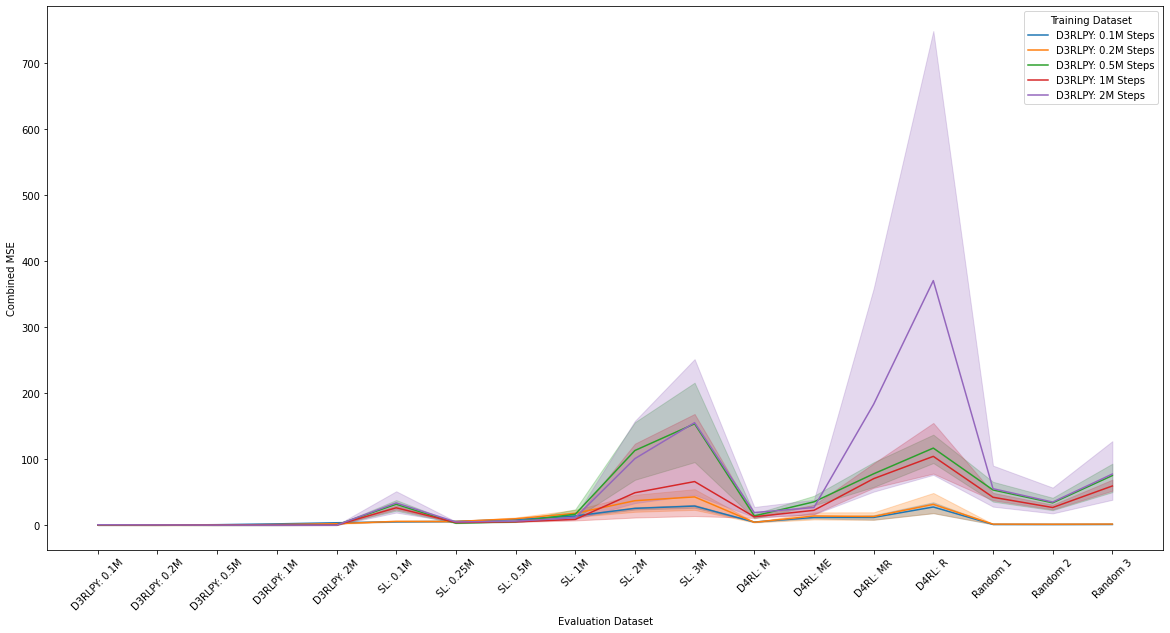

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=f'D3RLPY: {labels[i]}', c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.legend(title='Training Dataset')

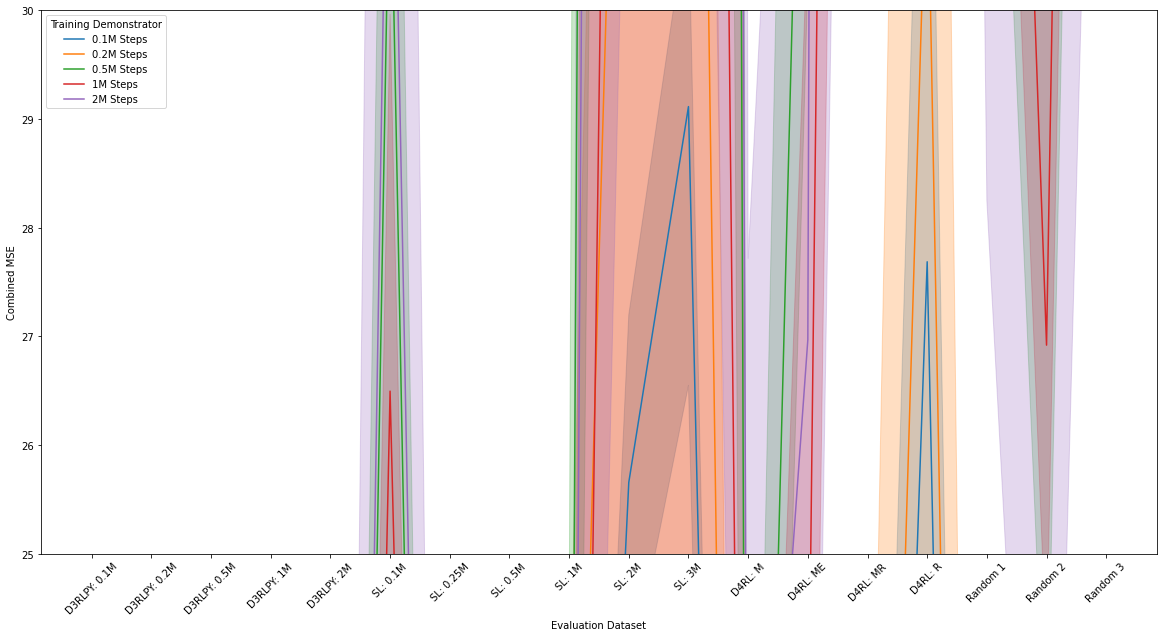

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs, exp_stds) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df, scores_01_steps_stds_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df, scores_02_steps_stds_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, scores_05_steps_stds_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, scores_1_steps_stds_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, scores_2_steps_stds_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_stds = exp_stds.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])
    # ax.fill_between(evaluation_datasets, plot_avgs-plot_stds, plot_avgs+plot_stds, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.set_ylim(25, 30)
ax.legend(title='Training Demonstrator')

# fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_0.1M_evaluation_overall_mse.png'), pad_inches=0.2, bbox_inches='tight')

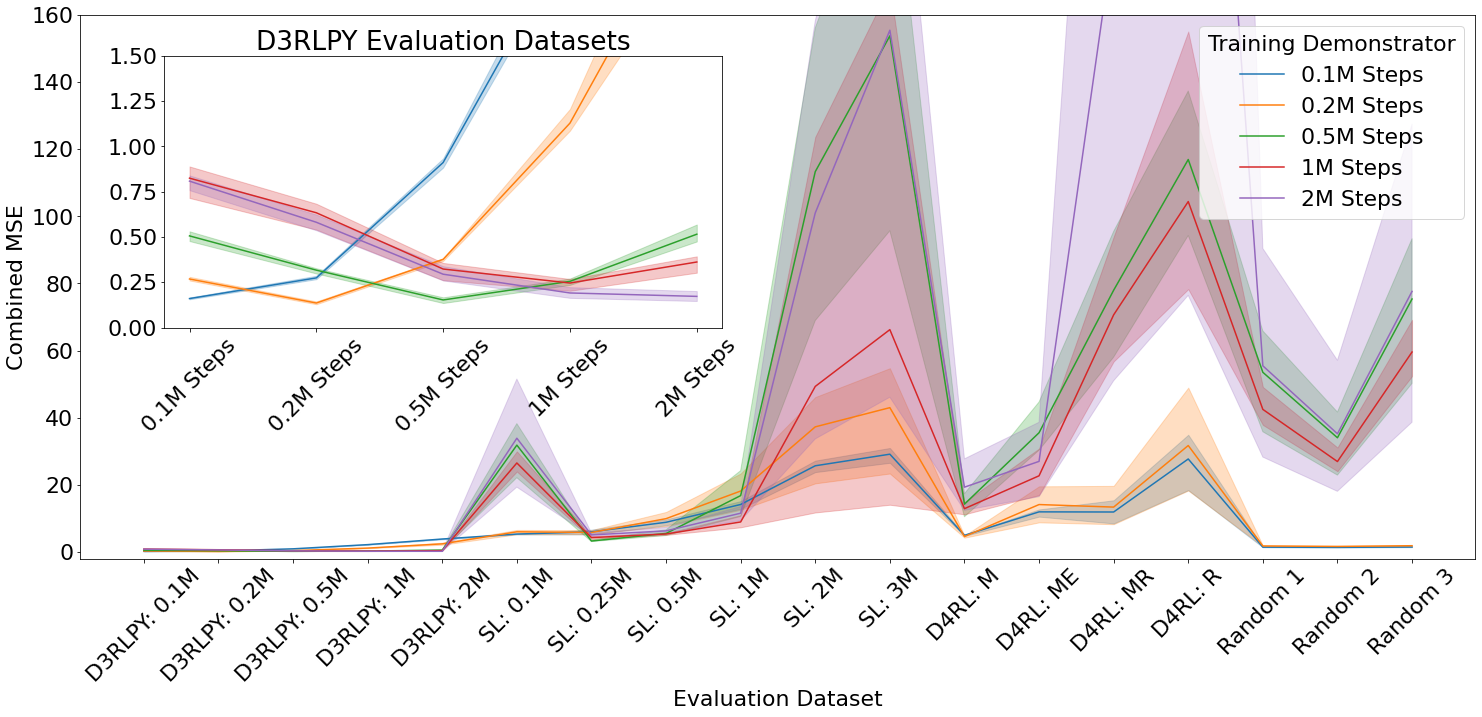

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ins = ax.inset_axes([0.06,0.425,0.4,0.5])

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ins.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ins.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for exp in novice_datasets:
#     ax.scatter(exp, -2, c='g', marker='*', s=300)

# for exp in experienced_datasets:
#     ax.scatter(exp, -6, c='r', marker='*', s=300)

ins.set_xticks(ins.get_xticks(), training_labels, rotation=45)
ins.set_title('D3RLPY Evaluation Datasets')
ins.set_ylim(0, 1.5)

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.set_ylim(-2,160)
ax.legend(title='Training Demonstrator', loc='upper right')

fig.savefig(os.path.join(FIG_DIR, 'ch6', 'd3rlpy_0.1M_evaluation_overall_mse_inset.png'), pad_inches=0.2, bbox_inches='tight')

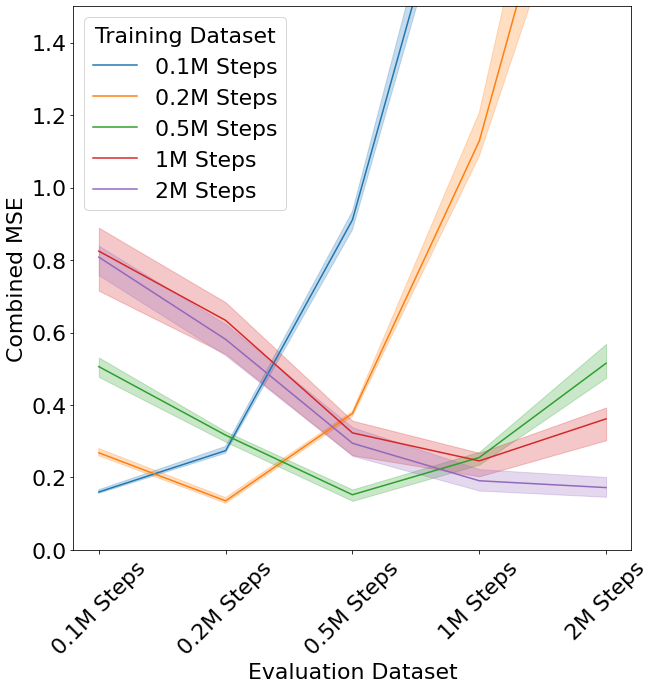

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.set_ylim(0, 1.5)
ax.legend(title='Training Dataset')

# fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_0.1M_training_overall_mse.png'), pad_inches=0.2, bbox_inches='tight')

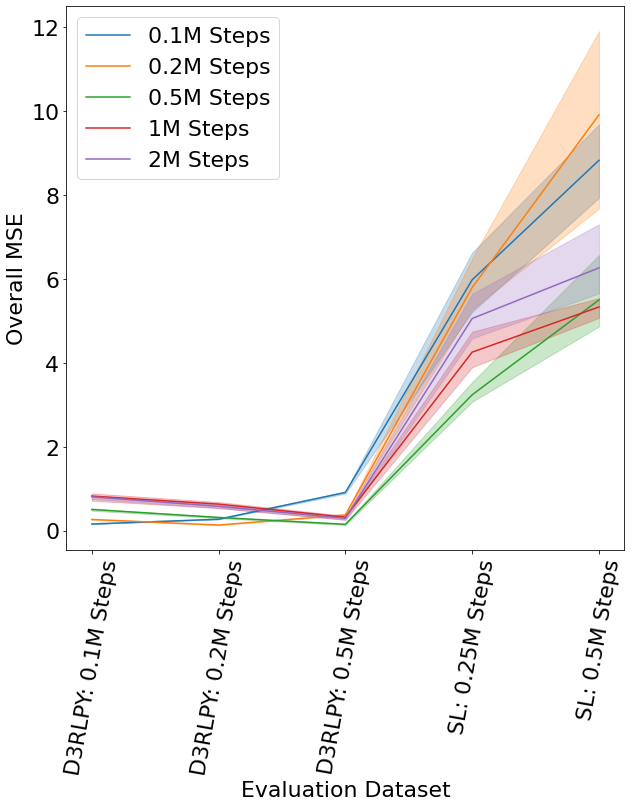

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    ax.plot(easy_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(easy_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), easy_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
# ax.set_ylim(0, 1.5)
ax.legend()

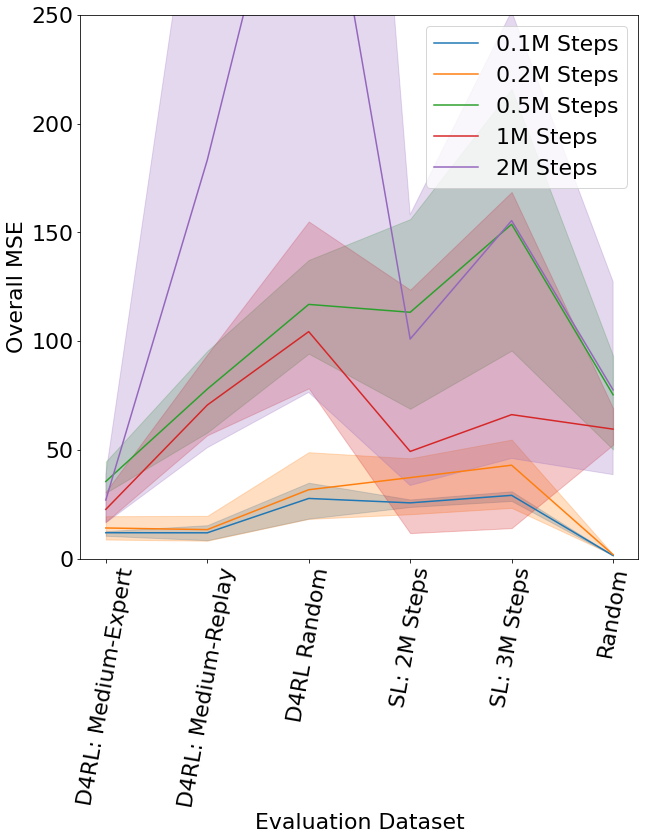

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    ax.plot(hard_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Overall MSE')
ax.set_ylim(0,250)
ax.legend()

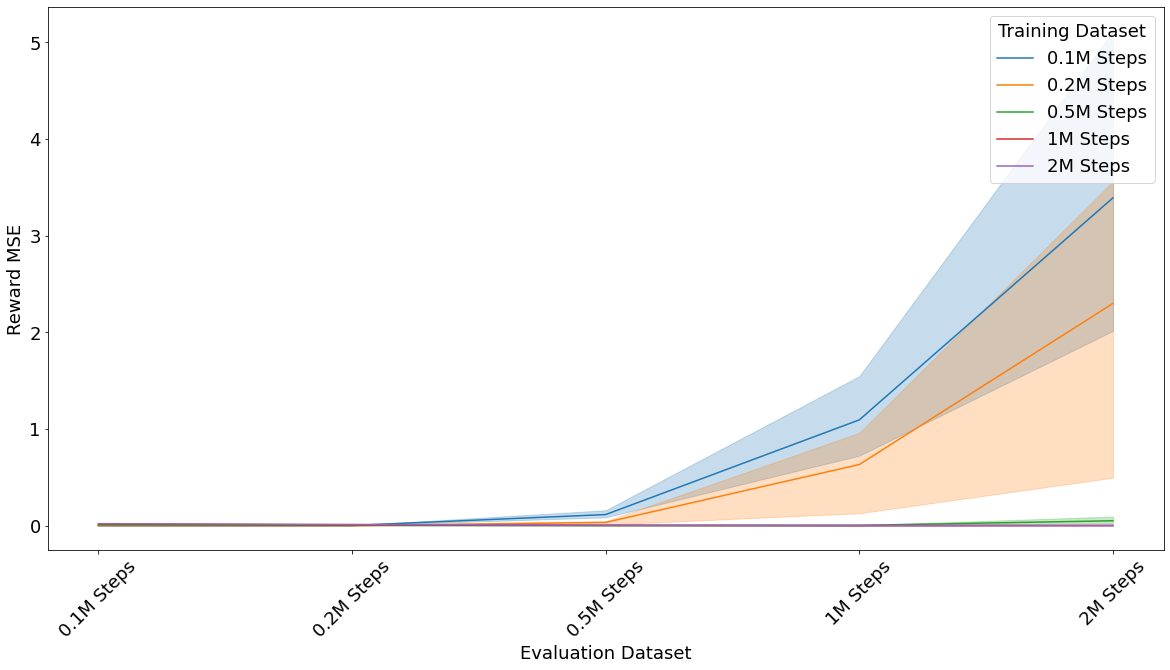

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'reward_mse'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Reward MSE')
ax.legend(title='Training Dataset')

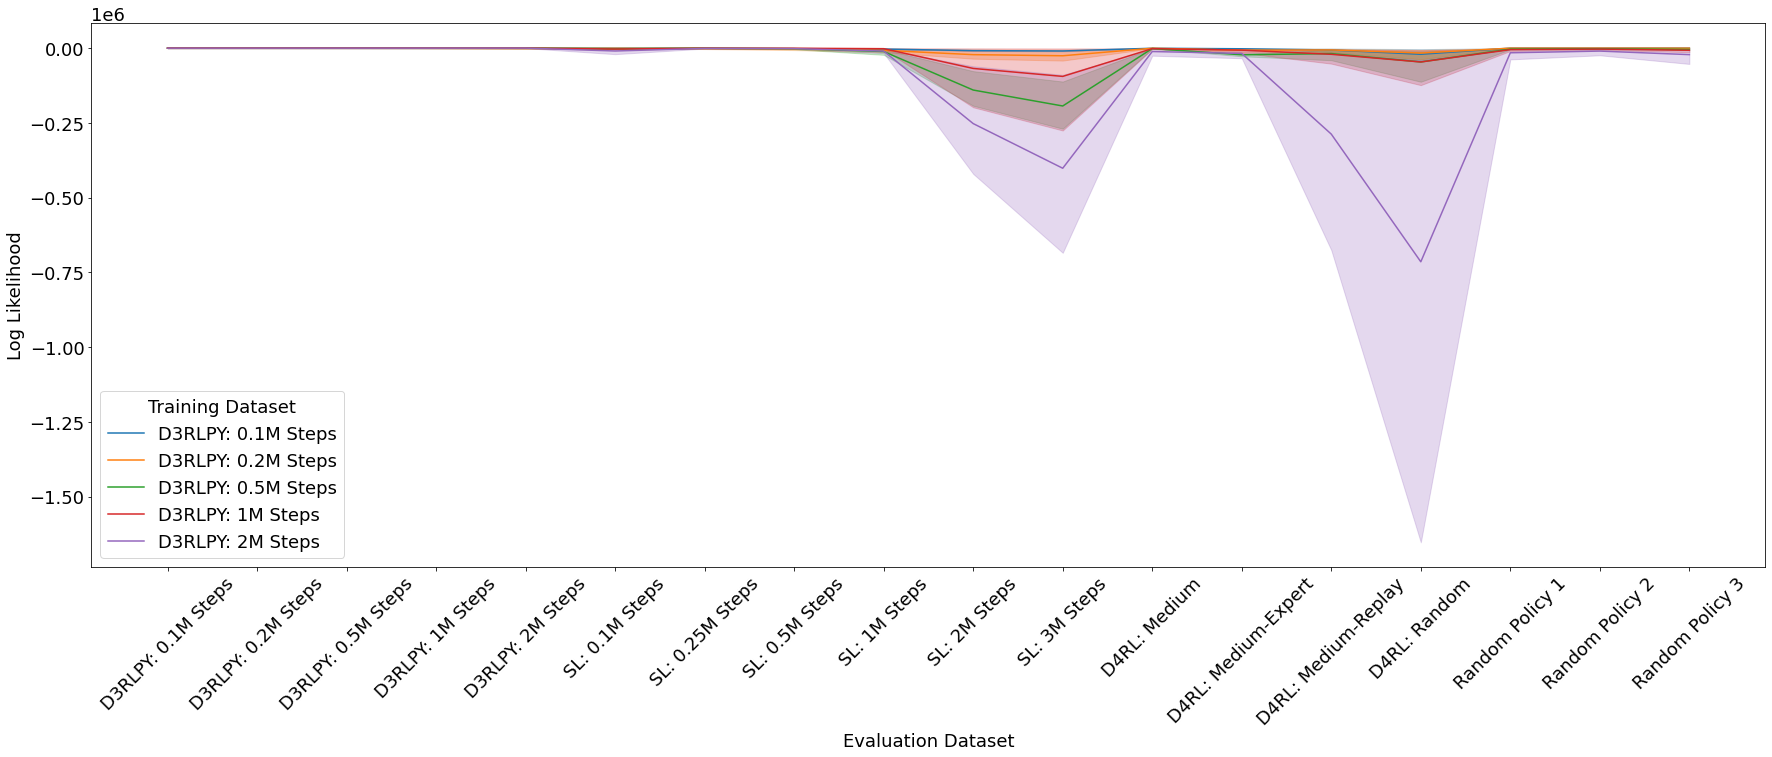

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=f'D3RLPY: {labels[i]}', c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Likelihood')
ax.legend(title='Training Dataset')

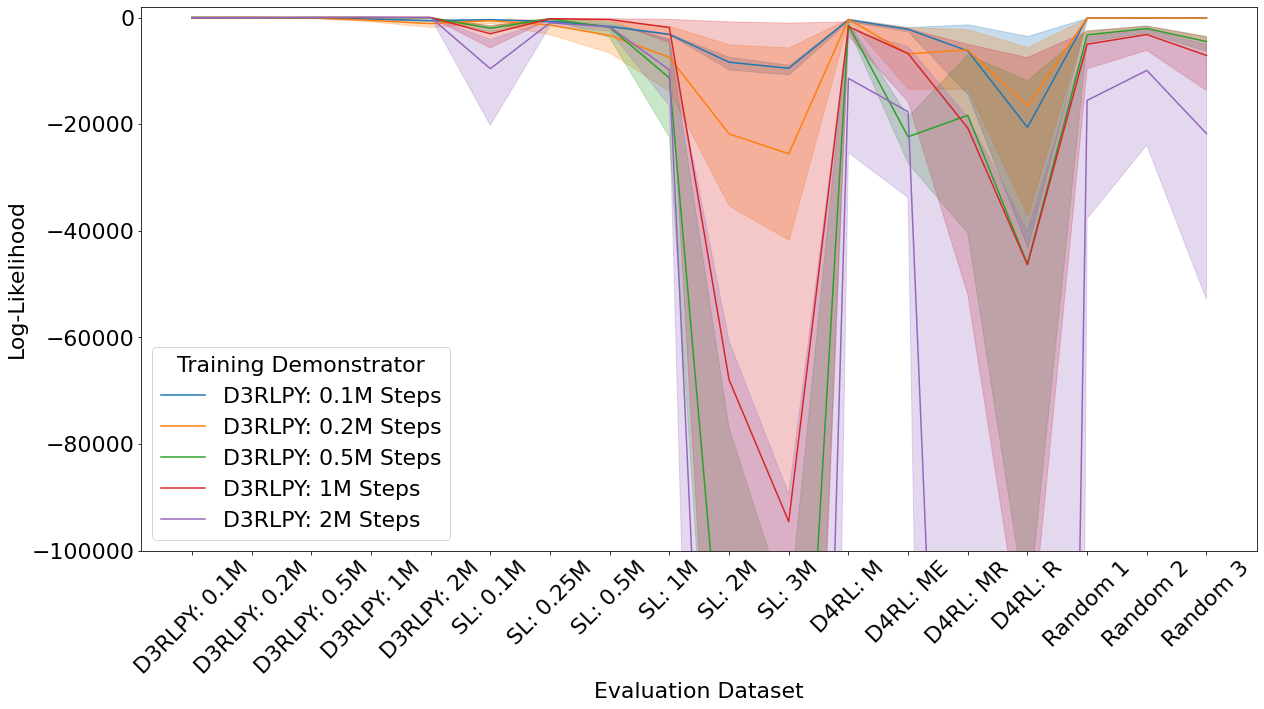

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=f'D3RLPY: {labels[i]}', c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(-100000,2000)
ax.legend(title='Training Demonstrator')

# fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_0.1M_evaluation_log_likelihood.png'), pad_inches=0.2, bbox_inches='tight')

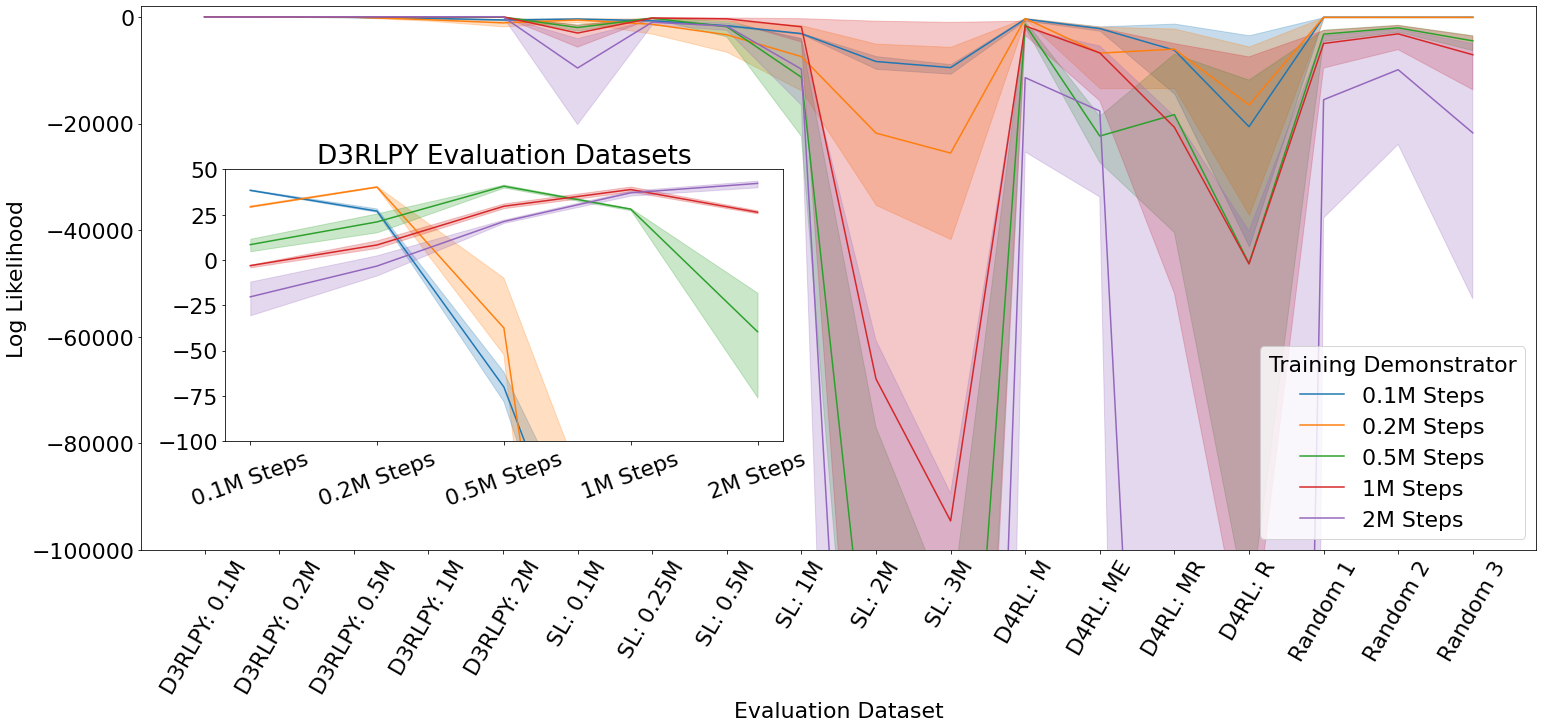

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ins = ax.inset_axes([0.06,0.2,0.4,0.5])

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ins.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ins.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ins.set_ylim(-100,50)
ins.set_xticks(ins.get_xticks(), training_labels, rotation=20)
ins.set_title('D3RLPY Evaluation Datasets')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=60)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-100000,2000)
ax.legend(loc='lower right', title='Training Demonstrator')

fig.savefig(os.path.join(FIG_DIR, 'ch6', 'd3rlpy_0.1M_evaluation_log_likelihood_inset.png'), pad_inches=0.2, bbox_inches='tight')

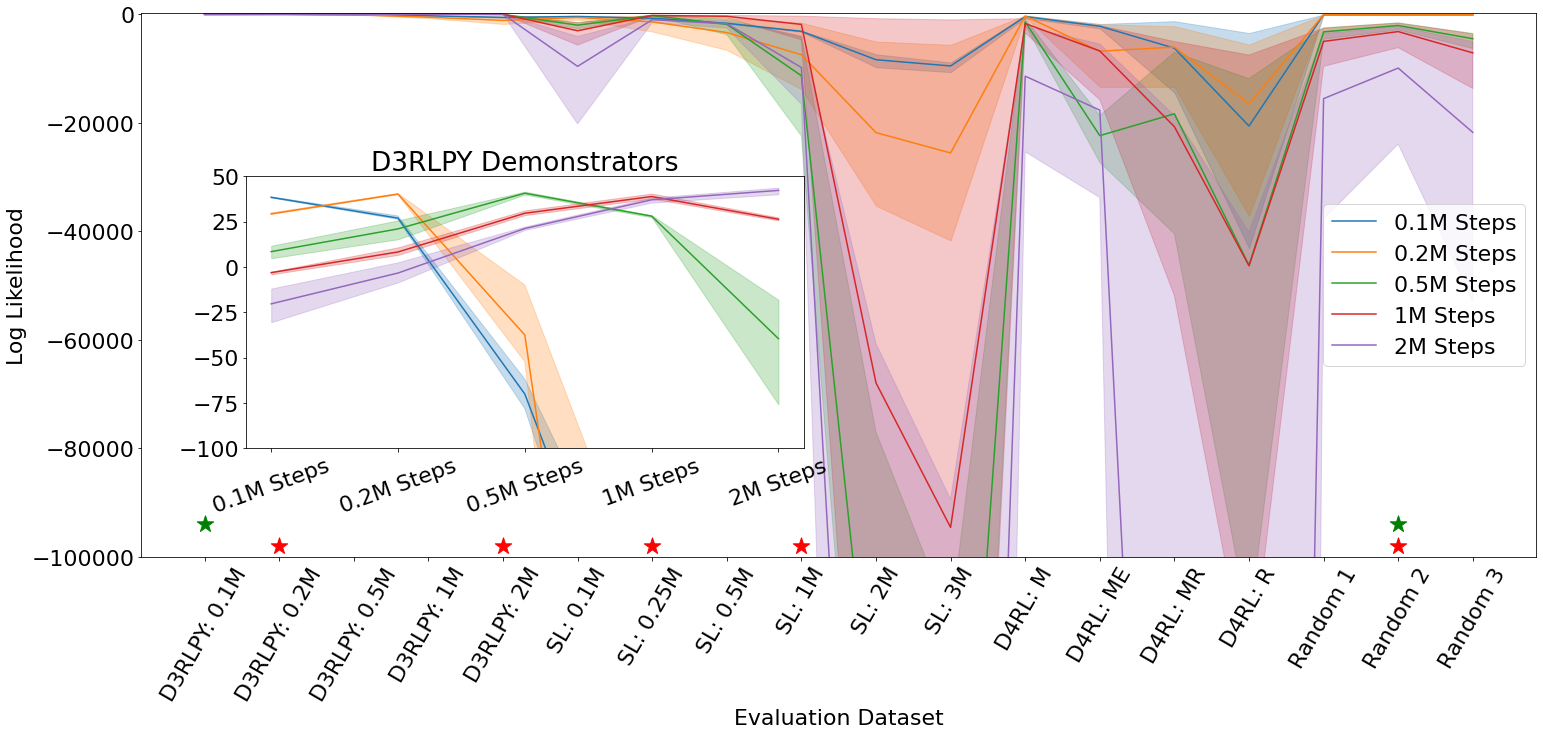

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
ins = ax.inset_axes([0.075,0.2,0.4,0.5])

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ins.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ins.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

for exp in novice_datasets:
    ax.scatter(exp, -94000, c='g', marker='*', s=300)

for exp in experienced_datasets:
    ax.scatter(exp, -98000, c='r', marker='*', s=300)

ins.set_ylim(-100,50)
ins.set_xticks(ins.get_xticks(), training_labels, rotation=20)
ins.set_title('D3RLPY Demonstrators')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=60)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-100000,200)
ax.legend(loc='center right')

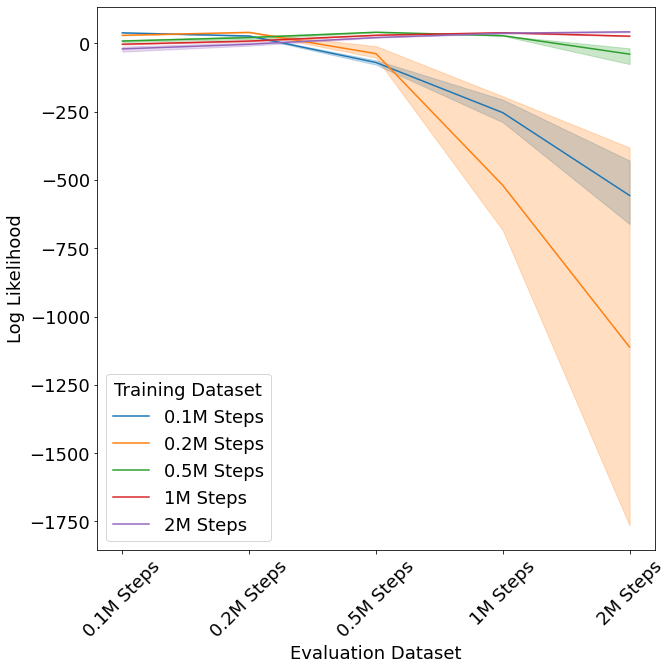

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Likelihood')
ax.legend(title='Training Dataset')

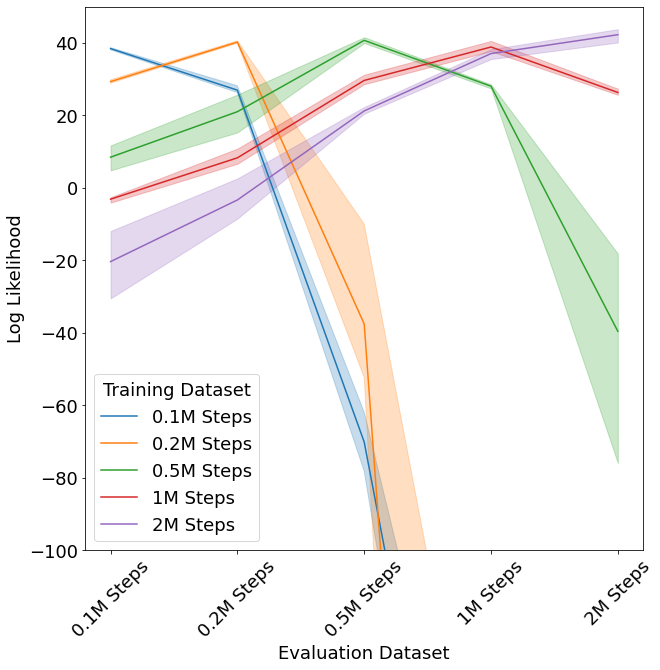

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-100,50)
ax.legend(title='Training Dataset')

# fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_0.1M_training_log_likelihood.png'), pad_inches=0.2, bbox_inches='tight')

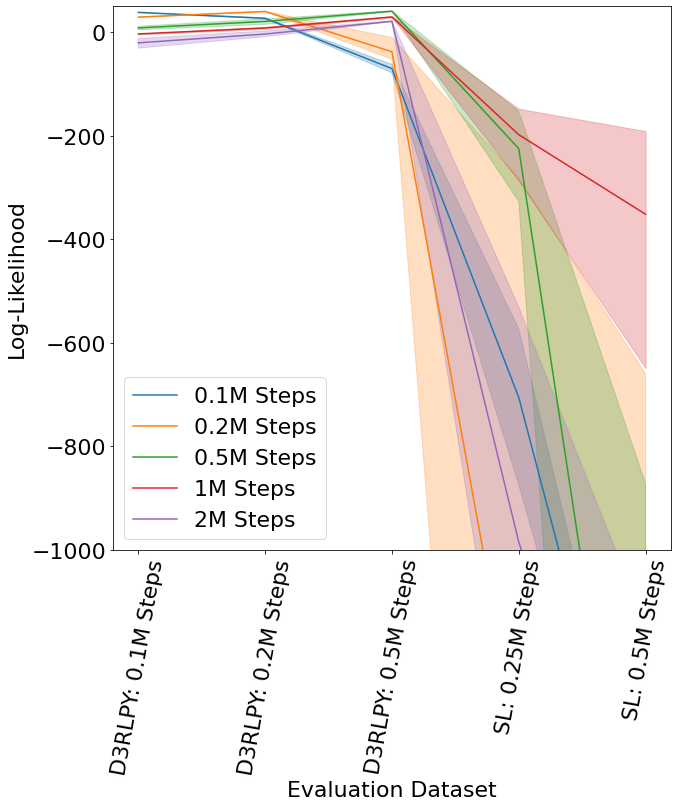

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[easy_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[easy_datasets][metric]
    ax.plot(easy_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(easy_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), easy_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log-Likelihood')
ax.set_ylim(-1000,50)
ax.legend()

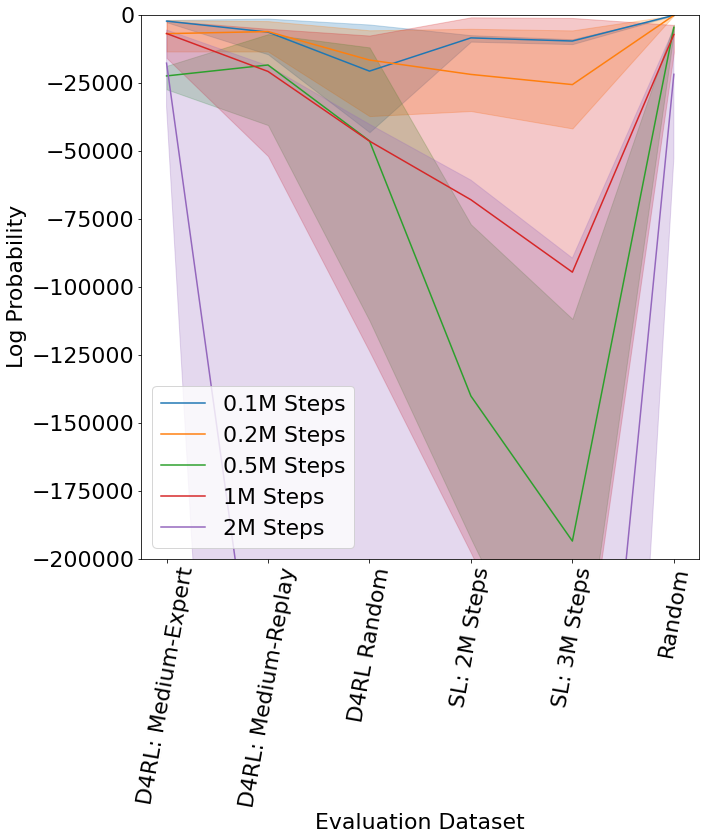

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    ax.plot(hard_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-200000, 50)
ax.legend()

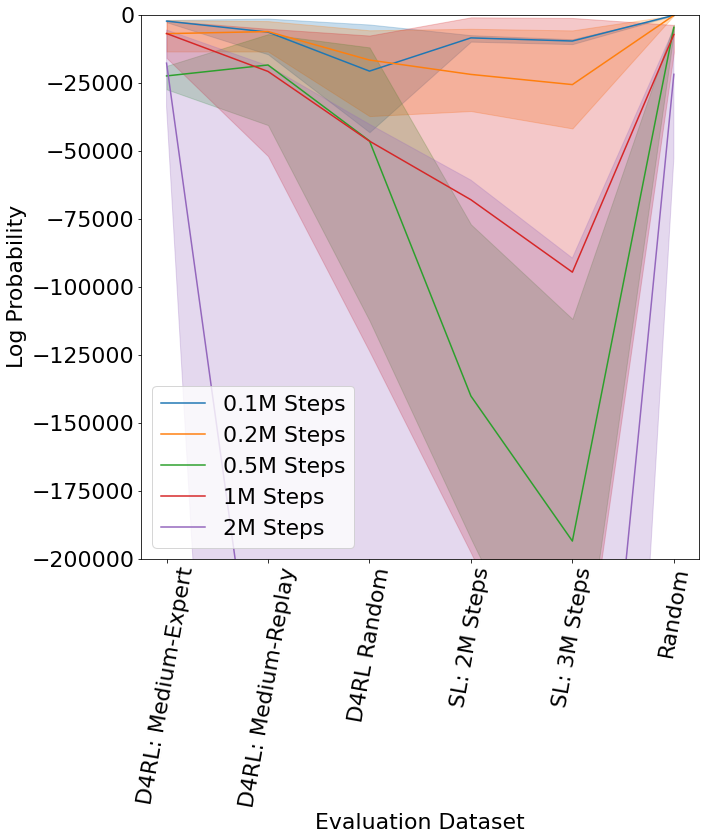

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'log_prob'
for i, (exp_avgs, exp_mins, exp_maxs) in enumerate([
    (scores_01_steps_avgs_df, scores_01_steps_mins_df, scores_01_steps_maxs_df),
    (scores_02_steps_avgs_df, scores_02_steps_mins_df, scores_02_steps_maxs_df),
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df),
]): #, scores_rex_10_nvb_avgs_df)):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[hard_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[hard_datasets][metric]
    ax.plot(hard_datasets, plot_avgs, label=labels[i], c=cols[i])
    ax.fill_between(hard_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[i])

# for i in training_datasets:
#     ax.axvline(i, ls='--', color='r')

ax.set_xticks(ax.get_xticks(), hard_labels, rotation=80)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Probability')
ax.set_ylim(-200000, 50)
ax.legend()

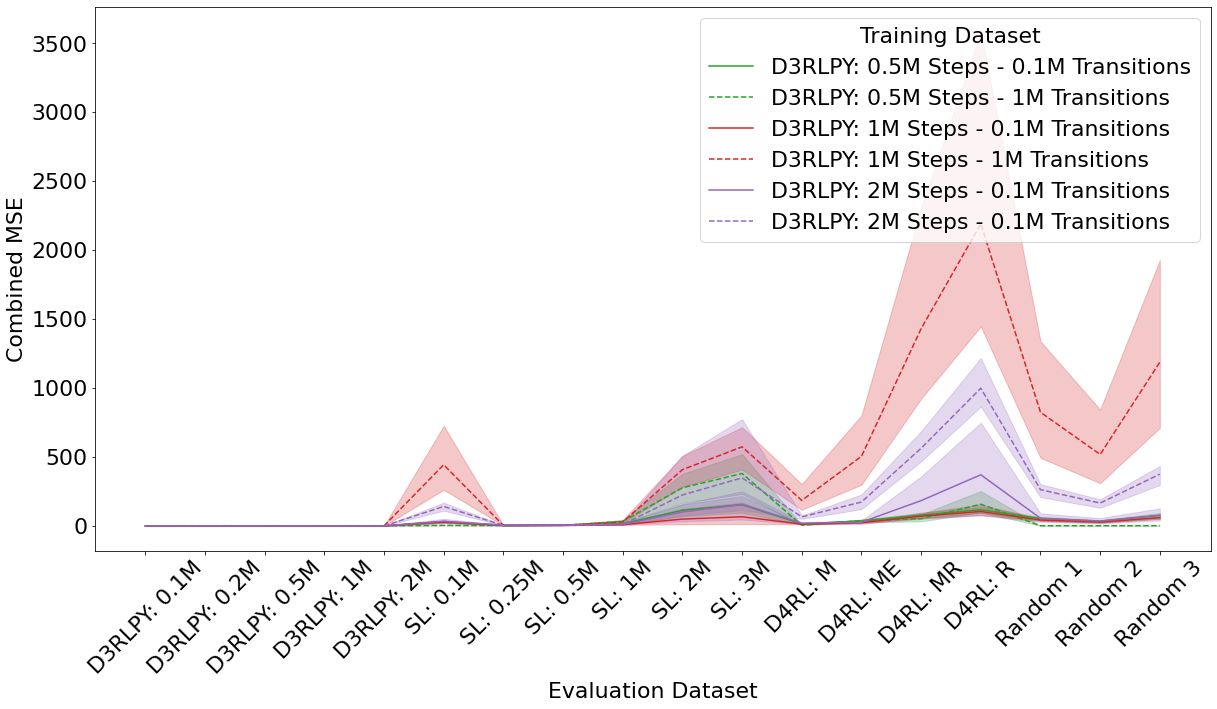

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'overall_mse'
custom_labels = ['0.5M Steps - 0.1M Transitions', '0.5M Steps - 1M Transitions', '1M Steps - 0.1M Transitions', '1M Steps - 1M Transitions', '2M Steps - 0.1M Transitions', '2M Steps - 0.1M Transitions']
for i, (exp_avgs, exp_mins, exp_maxs, col_id, ls) in enumerate([
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, 2, '-'),
    (scores_05_steps_avgs_df_1M, scores_05_steps_mins_df_1M, scores_05_steps_maxs_df_1M, 2, '--'),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, 3, '-'),
    (scores_1_steps_avgs_df_1M, scores_1_steps_mins_df_1M, scores_1_steps_maxs_df_1M, 3, '--'),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, 4, '-'),
    (scores_2_steps_avgs_df_1M, scores_2_steps_mins_df_1M, scores_2_steps_maxs_df_1M, 4, '--'),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=f'D3RLPY: {custom_labels[i]}', c=cols[col_id], ls=ls)
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.legend(title='Training Dataset', loc='upper right')

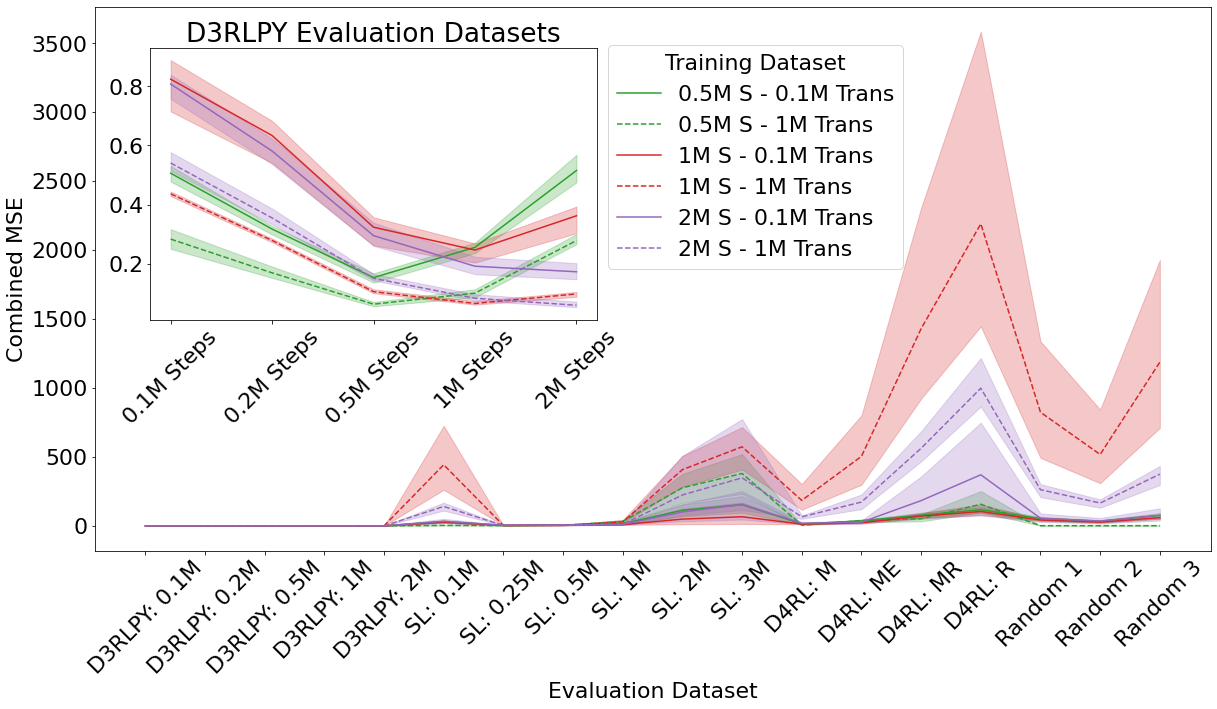

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ins = ax.inset_axes([0.05,0.425,0.4,0.5])

metric = 'overall_mse'
custom_labels = ['0.5M S - 0.1M Trans', '0.5M S - 1M Trans', '1M S - 0.1M Trans', '1M S - 1M Trans', '2M S - 0.1M Trans', '2M S - 1M Trans']
for i, (exp_avgs, exp_mins, exp_maxs, col_id, ls) in enumerate([
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, 2, '-'),
    (scores_05_steps_avgs_df_1M, scores_05_steps_mins_df_1M, scores_05_steps_maxs_df_1M, 2, '--'),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, 3, '-'),
    (scores_1_steps_avgs_df_1M, scores_1_steps_mins_df_1M, scores_1_steps_maxs_df_1M, 3, '--'),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, 4, '-'),
    (scores_2_steps_avgs_df_1M, scores_2_steps_mins_df_1M, scores_2_steps_maxs_df_1M, 4, '--'),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=custom_labels[i], c=cols[col_id], ls=ls)
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])

    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ins.plot(training_datasets, plot_avgs, label=custom_labels[i], c=cols[col_id], ls=ls)
    ins.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])


ins.set_xticks(ins.get_xticks(), training_labels, rotation=45)
ins.set_title('D3RLPY Evaluation Datasets')

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.legend(title='Training Dataset', loc='upper left', bbox_to_anchor=(0.45,0.95))
fig.savefig(os.path.join(FIG_DIR, 'ch4', 'd3rlpy_0.1M_vs_1M_overall_mse.png'), pad_inches=0.2, bbox_inches='tight')

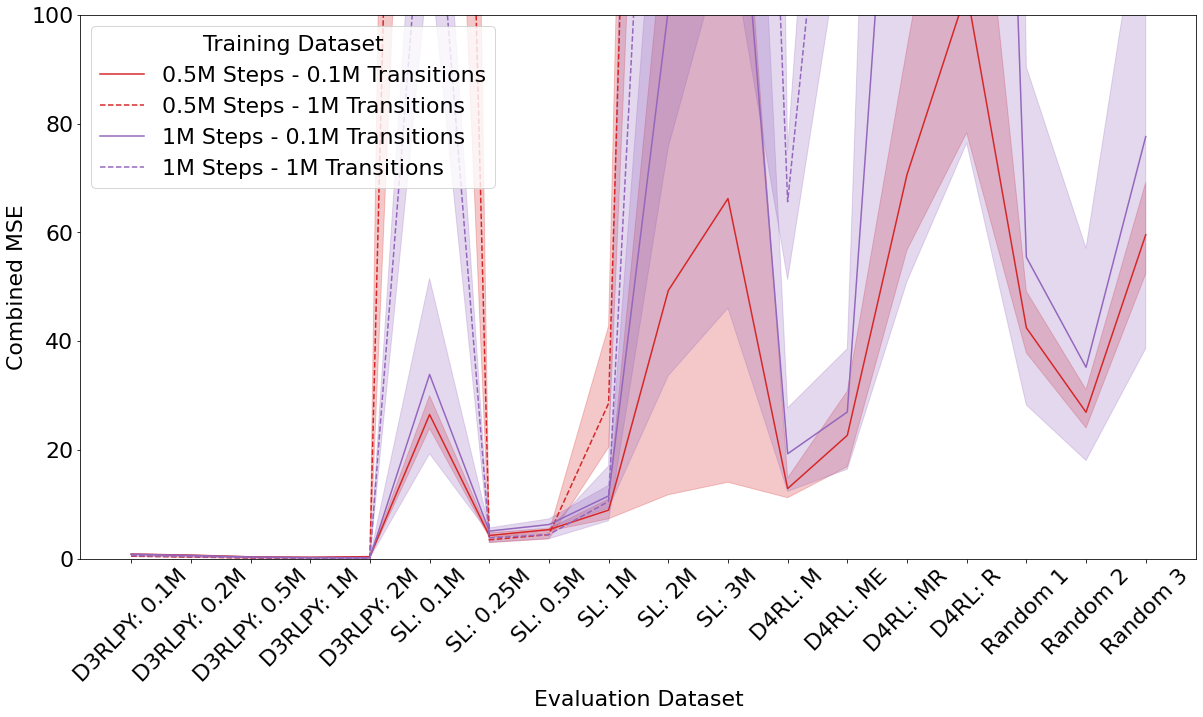

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'overall_mse'
custom_labels = ['0.5M Steps - 0.1M Transitions', '0.5M Steps - 1M Transitions', '1M Steps - 0.1M Transitions', '1M Steps - 1M Transitions', '2M Steps - 0.1M Transitions', '2M Steps - 0.1M Transitions']
for i, (exp_avgs, exp_mins, exp_maxs, col_id, ls) in enumerate([
    # (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, 2, '-'),
    # (scores_05_steps_avgs_df_1M, scores_05_steps_mins_df_1M, scores_05_steps_maxs_df_1M, 2, '--'),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, 3, '-'),
    (scores_1_steps_avgs_df_1M, scores_1_steps_mins_df_1M, scores_1_steps_maxs_df_1M, 3, '--'),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, 4, '-'),
    (scores_2_steps_avgs_df_1M, scores_2_steps_mins_df_1M, scores_2_steps_maxs_df_1M, 4, '--'),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=custom_labels[i], c=cols[col_id], ls=ls)
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.set_ylim(0, 100)
ax.legend(title='Training Dataset', loc='upper left')

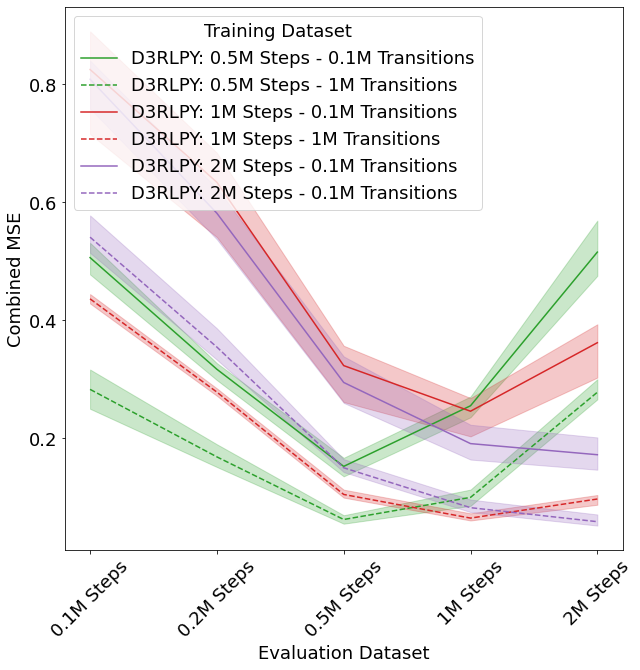

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

metric = 'overall_mse'
custom_labels = ['0.5M Steps - 0.1M Transitions', '0.5M Steps - 1M Transitions', '1M Steps - 0.1M Transitions', '1M Steps - 1M Transitions', '2M Steps - 0.1M Transitions', '2M Steps - 0.1M Transitions']
for i, (exp_avgs, exp_mins, exp_maxs, col_id, ls) in enumerate([
    (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, 2, '-'),
    (scores_05_steps_avgs_df_1M, scores_05_steps_mins_df_1M, scores_05_steps_maxs_df_1M, 2, '--'),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, 3, '-'),
    (scores_1_steps_avgs_df_1M, scores_1_steps_mins_df_1M, scores_1_steps_maxs_df_1M, 3, '--'),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, 4, '-'),
    (scores_2_steps_avgs_df_1M, scores_2_steps_mins_df_1M, scores_2_steps_maxs_df_1M, 4, '--'),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[training_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[training_datasets][metric]
    ax.plot(training_datasets, plot_avgs, label=f'D3RLPY: {custom_labels[i]}', c=cols[col_id], ls=ls)
    ax.fill_between(training_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])

ax.set_xticks(ax.get_xticks(), training_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Combined MSE')
ax.legend(title='Training Dataset', loc='upper left')

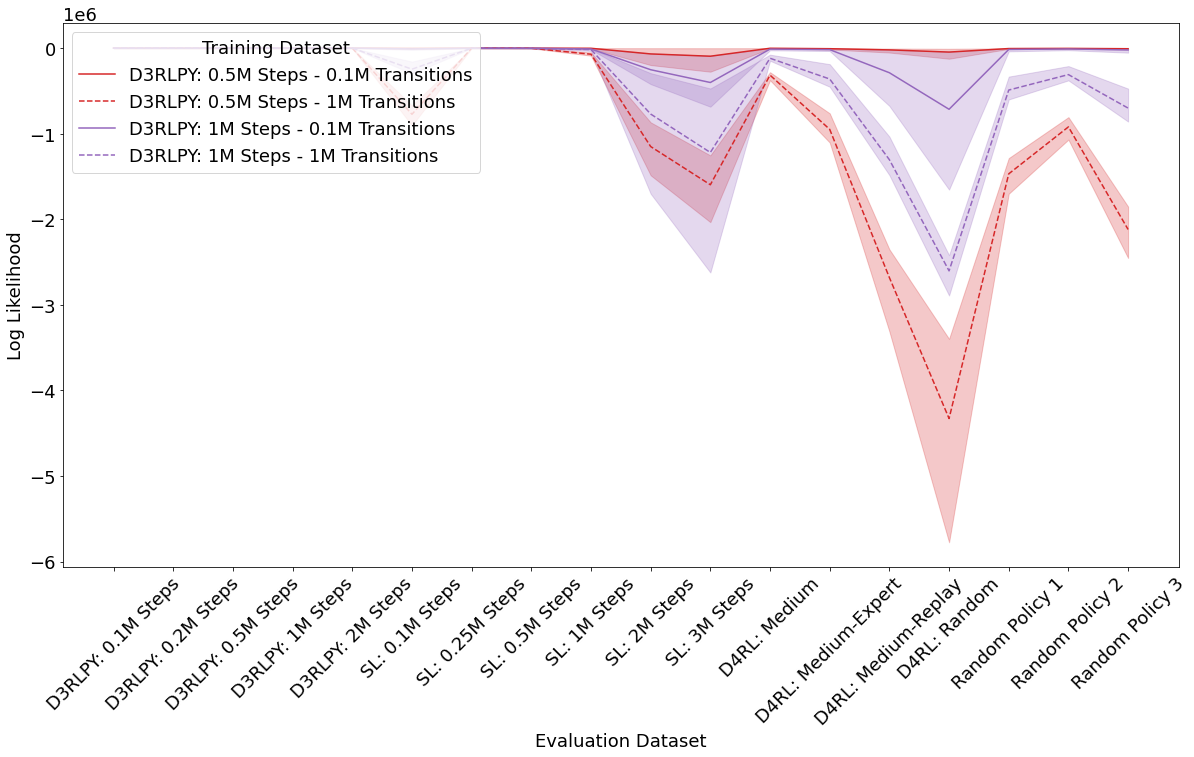

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'log_prob'
custom_labels = ['0.5M Steps - 0.1M Transitions', '0.5M Steps - 1M Transitions', '1M Steps - 0.1M Transitions', '1M Steps - 1M Transitions', '2M Steps - 0.1M Transitions', '2M Steps - 0.1M Transitions']
for i, (exp_avgs, exp_mins, exp_maxs, col_id, ls) in enumerate([
    # (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, 2, '-'),
    # (scores_05_steps_avgs_df_1M, scores_05_steps_mins_df_1M, scores_05_steps_maxs_df_1M, 2, '--'),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, 3, '-'),
    (scores_1_steps_avgs_df_1M, scores_1_steps_mins_df_1M, scores_1_steps_maxs_df_1M, 3, '--'),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, 4, '-'),
    (scores_2_steps_avgs_df_1M, scores_2_steps_mins_df_1M, scores_2_steps_maxs_df_1M, 4, '--'),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=f'D3RLPY: {custom_labels[i]}', c=cols[col_id], ls=ls)
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Likelihood')
ax.legend(title='Training Dataset', loc='upper left')

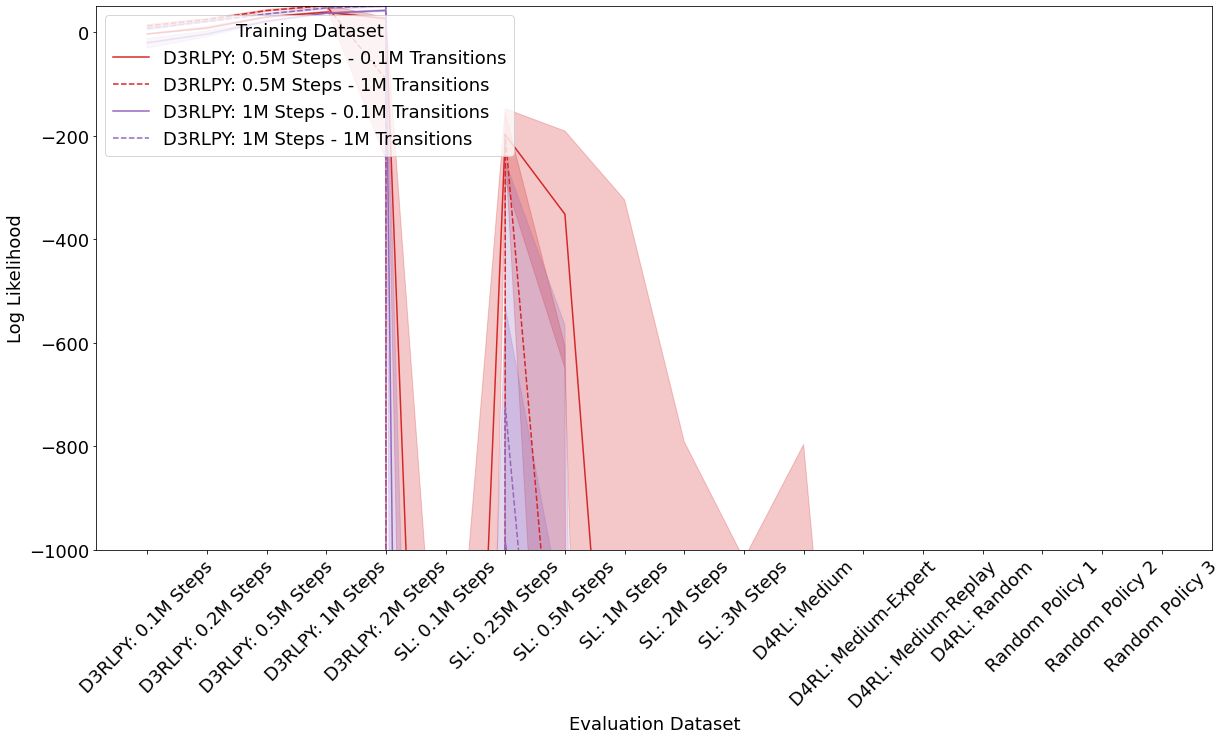

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

metric = 'log_prob'
custom_labels = ['0.5M Steps - 0.1M Transitions', '0.5M Steps - 1M Transitions', '1M Steps - 0.1M Transitions', '1M Steps - 1M Transitions', '2M Steps - 0.1M Transitions', '2M Steps - 0.1M Transitions']
for i, (exp_avgs, exp_mins, exp_maxs, col_id, ls) in enumerate([
    # (scores_05_steps_avgs_df, scores_05_steps_mins_df, scores_05_steps_maxs_df, 2, '-'),
    # (scores_05_steps_avgs_df_1M, scores_05_steps_mins_df_1M, scores_05_steps_maxs_df_1M, 2, '--'),
    (scores_1_steps_avgs_df, scores_1_steps_mins_df, scores_1_steps_maxs_df, 3, '-'),
    (scores_1_steps_avgs_df_1M, scores_1_steps_mins_df_1M, scores_1_steps_maxs_df_1M, 3, '--'),
    (scores_2_steps_avgs_df, scores_2_steps_mins_df, scores_2_steps_maxs_df, 4, '-'),
    (scores_2_steps_avgs_df_1M, scores_2_steps_mins_df_1M, scores_2_steps_maxs_df_1M, 4, '--'),
]):
    plot_avgs = exp_avgs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_mins = exp_mins.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    plot_maxs = exp_maxs.set_index('evaluation_dataset').loc[evaluation_datasets][metric]
    ax.plot(evaluation_datasets, plot_avgs, label=f'D3RLPY: {custom_labels[i]}', c=cols[col_id], ls=ls)
    ax.fill_between(evaluation_datasets, plot_mins, plot_maxs, alpha=0.25, color=cols[col_id])

ax.set_xticks(ax.get_xticks(), evaluation_labels, rotation=45)
ax.set_xlabel('Evaluation Dataset')
ax.set_ylabel('Log Likelihood')
ax.set_ylim(-1000,50)
ax.legend(title='Training Dataset', loc='upper left')